<a href="https://colab.research.google.com/github/pdsouza01/CS6375_ML/blob/main/Assignment_01_pmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
%matplotlib inline

csv_file = 'https://raw.githubusercontent.com/pdsouza01/ML_Project/main/datasets/housing/housingdataset.csv'

def load_housing_data():
  df = pd.read_csv(csv_file)
  return df
  

housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


# New Section

In [9]:
housing.info()
#Data Analysis 
#1. we can see in the output that "total_bedrooms" has 20433 and rest of other parameters are 20640 
#2.  "ocean_proximity" is object whose values are as below 

housing["ocean_proximity"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


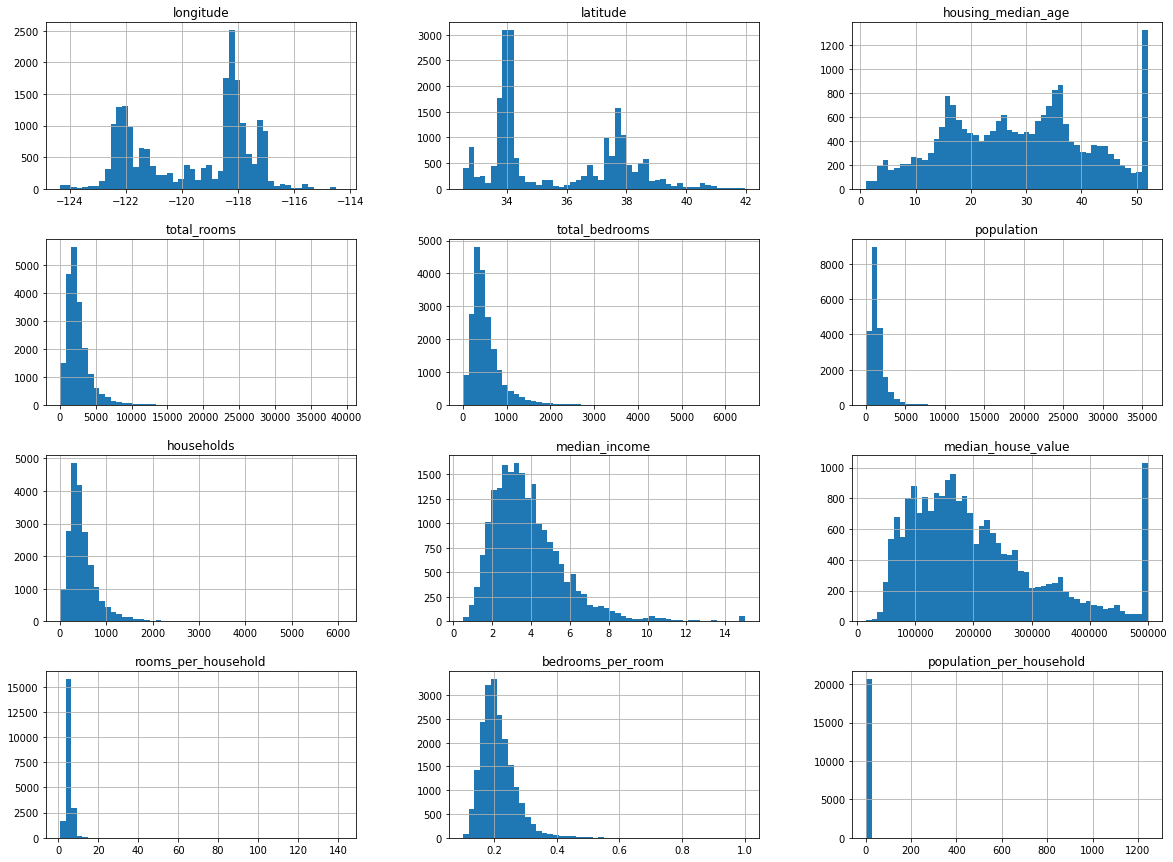

In [75]:
#lets plot the histogram 
import matplotlib.pyplot as ply
housing.hist(bins=50, figsize=(20,15))
ply.show()


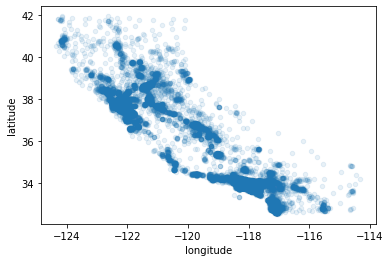

In [23]:
#data visualization
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)
#setting alpha helps in better visualization when data points are dense 
#now we can see that po

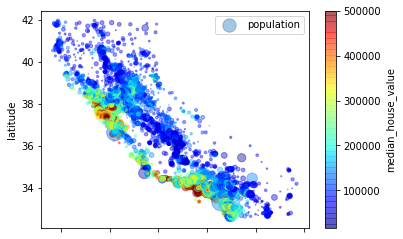

In [76]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population",
 c="median_house_value", cmap=ply.get_cmap("jet"), colorbar=True,
)
ply.legend()
#below figure shows that the house value is closely related to location and population 

In [46]:
#now lets find the standard correlation coefficient among each pair 
correlation_matrix = housing.corr()
#print the correlation coefficent of other parameters with median_house_vlaue
correlation_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

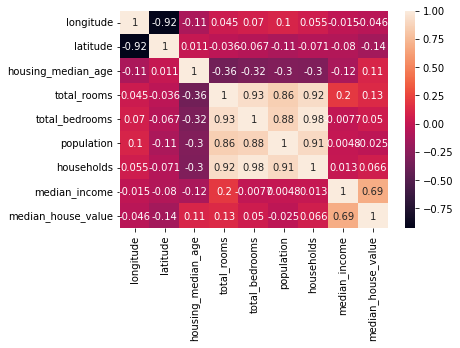

In [49]:
import seaborn as sns
sns.heatmap(data=correlation_matrix, annot=True)




In [65]:
#linear regression with only two parameter 
X = housing[["median_income","total_rooms"]]
Y = housing["median_house_value"]

#split data into training set 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train.head()




(16512, 2)
(4128, 2)
(16512,)
(4128,)


,median_income,total_rooms
5500,3.7250,1701
15860,4.5057,2316
7232,2.1250,984
6115,2.6629,1788
8828,2.5812,1390


In [58]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = pd.DataFrame(s.fit(X).fit_transform(X))


from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,Y_train)
y_train_predict = linear_reg.predict(X_train)
print("Predictions:\t",y_train_predict) 

Predictions:	 [200457.85838373 233011.44512345 133723.4885473  ... 287376.46381692
 194839.34441588 226475.33718272]


In [61]:
#performance evaluation on training data 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 83592.20289335302
R2 score is 0.4703946530052895




In [63]:
#performance evaluation on test data 
y_test_predict = linear_reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for testing set
--------------------------------------
RMSE is 84300.09269898168
R2 score is 0.48491789379158734


In [67]:
#tuning parametrs 
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [69]:
#linear regression with only two parameter 
X1 = housing[["median_income","rooms_per_household"]]
Y1 = housing["median_house_value"]

#split data into training set 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state=5)
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)
X1_train.head()


(16512, 2)
(4128, 2)
(16512,)
(4128,)


,median_income,rooms_per_household
5500,3.7250,3.443320
15860,4.5057,4.865546
7232,2.1250,3.464789
6115,2.6629,4.952909
8828,2.5812,2.970085


In [71]:
X1 = pd.DataFrame(s.fit(X1).fit_transform(X1))

linear_reg = LinearRegression()
linear_reg.fit(X1_train,Y1_train)
y1_train_predict = linear_reg.predict(X1_train)
print("Predictions:\t",y1_train_predict) 

Predictions:	 [207123.99602225 235883.4585942  137931.02493176 ... 280686.93470531
 196037.51046829 225843.29253734]


The model performance for training set
--------------------------------------
RMSE is 83176.85105583229
R2 score is 0.4756445698174917




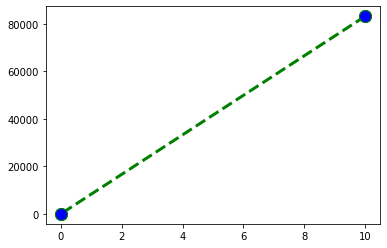

In [87]:
rmse1 = (np.sqrt(mean_squared_error(Y1_train, y1_train_predict)))
r21 = r2_score(Y1_train, y1_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse1))
print('R2 score is {}'.format(r21))
print("\n")

#we can see there is slight improvement in the performace 
